<a href="https://colab.research.google.com/github/sherlockian4869/python/blob/main/Analysis/Scraping_Morphological_Analysis_WordCloud_Spreadsheet_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mecab-python3
!pip install unidic
!python -m unidic download

     |████████████████████████████████| 488 kB 8.2 MB/s 
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7426 sha256=1916c3e69071d36403b06f97d24da8733d3a572d1e4864ca0d7754b8c97194f2
  Stored in directory: /root/.cache/pip/wheels/ce/4d/f1/170bb74b559ca338113c0315c9805e16dfd0a12411ec6b1122
Successfully built unidic
download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:22<00:00, 23.5MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.7/dist-packages/unidic/dicdir


In [3]:
import requests
from bs4 import BeautifulSoup

url = "https://news.google.com/?hl=ja&gl=JP&ceid=JP:ja"

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

elems = soup.find_all('a', class_='DY5T1d')

In [4]:
import MeCab
import unidic

datas = []

news = ""
news_list = []
for e in elems:
  news += e.getText() + '\n'
  news_list.append(e.getText())

print(news_list)
datas.append(news_list)
print(datas)
print(news)

['バイデン大統領 「真珠湾」に言及 全体主義への勝利の始まり 米議会襲撃１年', '米議会襲撃から1年 バイデン氏がトランプ氏を批判(2022年1月7日)', 'トランプ氏、一転会見中止', '米議会乱入事件から１年 米大統領はトランプ氏を非難', '医療者感染で220人欠勤…沖縄コロナ「非常事態」迫る 診療体制の維持に課題', '政府“まん延防止”3県適用へ 夕方にも方針説明(2022年1月6日)', '感染急拡大の沖縄県 当面の間、県立学校で分散登校実施', '沖縄「まん延防止」9～31日案 本島と宮古島で飲食店に時短要請を検討', '首都高で大規模な立ち往生 10時間以上続く', '東京都内の首都高で立ち往生 積雪で路面凍結 板橋－江北JC間 - 毎日新聞', '道路影響予測 関東は大雪の影響続く 北陸から北海道の日本海側も要注意(気象予報士 青山 亜紀子 2022年01月07日)', '首都高で大規模な立ち往生 10時間以上続く(2022年1月7日)', '東京で午後2時に積雪1センチ 東京の積雪は2020年3月以来 気象庁(2022年1月6日)', '南岸低気圧、寒気引き込む 関東各地で大雪', '東京23区に大雪警報、1月6日の秋葉原', '「第6波」都市圏緊迫 医療体制安定も専門家「病床使用率注視を」 - 毎日新聞', '小池都知事「新たなフェーズに」 １週間前の１０倍に急増', '＜社説＞コロナ「第6波」 教訓生かし対策徹底を', '「全国的に第6波に突入」 日本医師会長、感染拡大スピードに危機感', '【LIVE】関東は氷点下の朝、路面凍結に注意 2022年1月7日(金)／気象情報・地震情報〈ウェザーニュースLiVE〉', '【1月7日 朝 気象情報】これからの天気', '1月6日(木) 各地の気温変化と最適な服装', '1月5日の天気', '在宅勤務はもう限界……テレワークつらい勢の悲痛な叫び リモート9割のサイボウズで、社員が「つらみ」を感じるポイント', 'インボイスとは？ なぜ“大問題”なのか？ 基礎から対策まで分かりやすく解説', '「iPhone」に匹敵するアップルの新製品が2022年に登場するかもしれない', '原発が水素も量産 10年ぶり再稼働の実証炉が秘める力', '富士通のLOOXが復活！600g台の2in1「FMV LOOX

In [5]:
mecab = MeCab.Tagger('')
node = mecab.parseToNode(news)
words = []
while node:
  hinshi = node.feature.split(',')[0]
  word = node.surface
  if hinshi in ['名詞']:
    origin = word
    words.append(origin)

  node = node.next

print(words)
datas.append(words)
print(datas)

['バイデン', '大統領', '真珠', '湾', '言及', '全体', '主義', '勝利', '始まり', '米', '議会', '襲撃', '１', '年', '米', '議会', '襲撃', '1', '年', 'バイデン', 'トランプ', '批判', '2022', '年', '1', '月', '7', 'トランプ', '一転', '会見', '中止', '米', '議会', '乱入', '事件', '１', '年', '米', '大統領', 'トランプ', '非難', '医療', '感染', '220', '欠勤', '沖縄', 'コロナ', '事態', '診療', '体制', '維持', '課題', '政府', 'まん延', '防止', '3', '県', '適用', '夕方', '方針', '説明', '2022', '年', '1', '月', '6', '感染', '急', '拡大', '沖縄', '県', '当面', '間', '県立', '学校', '分散', '登校', '実施', '沖縄', 'まん延', '防止', '9', '31', '案', '本島', '宮古島', '飲食', '時短', '要請', '検討', '首都', '規模', '立ち', '往生', '10', '時間', '以上', '東京', '都', '首都', '往生', '積雪', '路面', '凍結', '板橋', '江北', 'JC', '毎日', '新聞', '道路', '影響', '予測', '関東', '大雪', '影響', '北陸', '北海道', '日本', '側', '注意', '気象', '予報', '青山', '亜紀子', '2022', '年', '01', '月', '07', '首都', '規模', '立ち', '往生', '10', '時間', '以上', '2022', '年', '1', '月', '7', '東京', '午後', '2', '時', '積雪', '1', 'センチ', '東京', '積雪', '2020', '年', '3', '月', '以来', '気象', '2022', '年', '1', '月', '6', '南岸', '気圧', '寒気', '関東', '各地', '大雪', '東京', '2

In [6]:
import collections
count = collections.Counter(words)
print(count)
print(count.most_common(30))

Counter({'年': 12, '1': 12, '月': 12, '2022': 7, '6': 7, '米': 4, '7': 4, '東京': 4, '気象': 4, '議会': 3, '１': 3, 'トランプ': 3, '感染': 3, '沖縄': 3, '3': 3, '首都': 3, '往生': 3, '10': 3, '積雪': 3, '関東': 3, '大雪': 3, '日本': 3, '2': 3, '情報': 3, '5': 3, 'バイデン': 2, '大統領': 2, '襲撃': 2, '医療': 2, 'コロナ': 2, '体制': 2, 'まん延': 2, '防止': 2, '県': 2, '拡大': 2, '9': 2, '規模': 2, '立ち': 2, '時間': 2, '以上': 2, '都': 2, '路面': 2, '凍結': 2, '毎日': 2, '新聞': 2, '影響': 2, '注意': 2, '各地': 2, '対策': 2, '朝': 2, '天気': 2, 'LOOX': 2, '開発': 2, '真珠': 1, '湾': 1, '言及': 1, '全体': 1, '主義': 1, '勝利': 1, '始まり': 1, '批判': 1, '一転': 1, '会見': 1, '中止': 1, '乱入': 1, '事件': 1, '非難': 1, '220': 1, '欠勤': 1, '事態': 1, '診療': 1, '維持': 1, '課題': 1, '政府': 1, '適用': 1, '夕方': 1, '方針': 1, '説明': 1, '急': 1, '当面': 1, '間': 1, '県立': 1, '学校': 1, '分散': 1, '登校': 1, '実施': 1, '31': 1, '案': 1, '本島': 1, '宮古島': 1, '飲食': 1, '時短': 1, '要請': 1, '検討': 1, '板橋': 1, '江北': 1, 'JC': 1, '道路': 1, '予測': 1, '北陸': 1, '北海道': 1, '側': 1, '予報': 1, '青山': 1, '亜紀子': 1, '01': 1, '07': 1, '午後': 1, '時': 1, 'センチ': 1, '

In [7]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,596 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155225 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

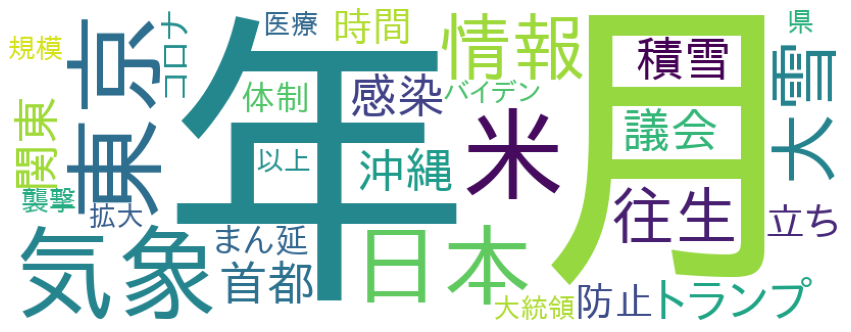

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import codecs
fpath = './fonts/IPAfont00303/ipagp.ttf'

def show_word_cloud(ws):
    ws_show = []
    for i in range(len(ws)):
        word_times = ws[i][1]
        if word_times>0:
            for j in range(word_times):
                ws_show.append(ws[i][0])
    random.shuffle(ws_show)
    # スペース区切り
    texts = ' '.join(ws_show)
    
    # 描画
    wc = WordCloud(background_color="white", font_path=fpath, 
                   width=820, height=312, regexp=r"[\w']+").generate(texts)
    plt.figure(figsize=(15,12))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

show_word_cloud(count.most_common(40))

In [11]:
import gspread
from google.colab import auth
import datetime
from oauth2client.client import GoogleCredentials

dt = datetime.date.today()
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [12]:
sheet = gc.open_by_key('1VfQXxNTpg7NAsSLSg-NrQSOgycwwrFcL4nbiJcDiK88')

In [13]:
worksheet = sheet.add_worksheet(title = f'GoogleNews_{dt}', rows=10, cols=500)

In [14]:
for temp in datas:
  worksheet.append_row(temp)